In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import datetime

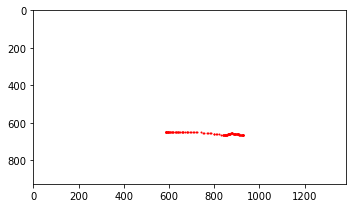

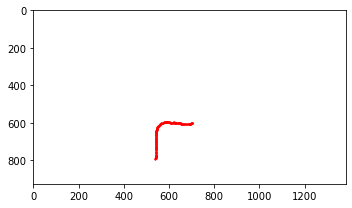

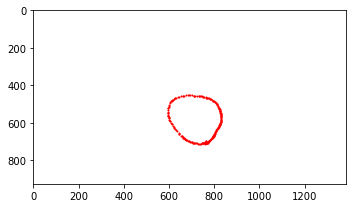

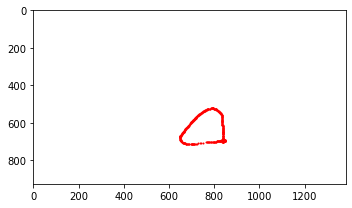

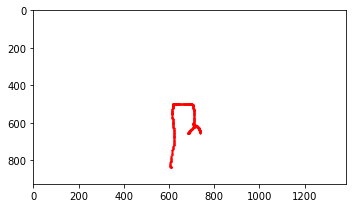

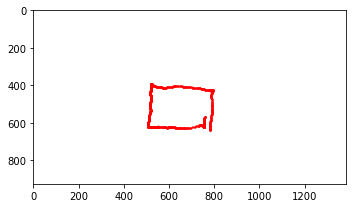

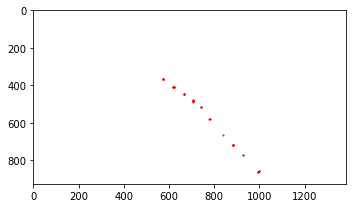

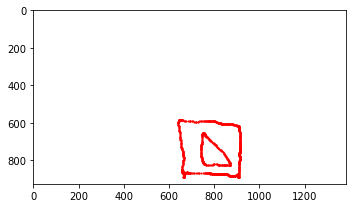

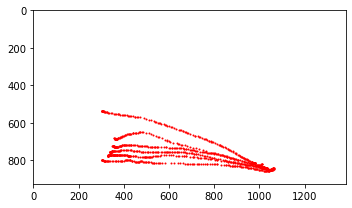

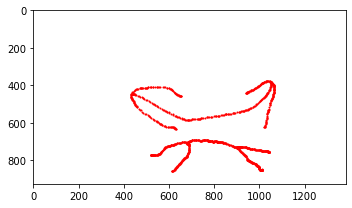

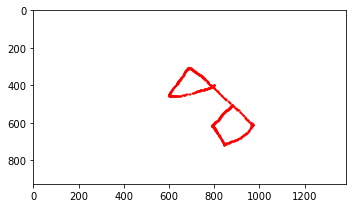

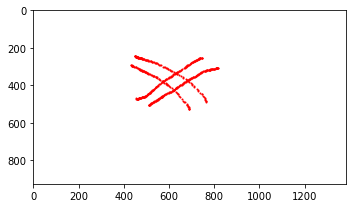

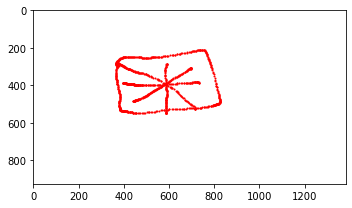

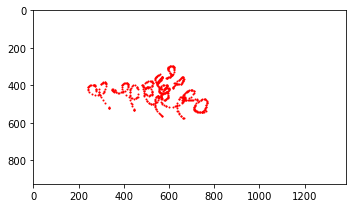

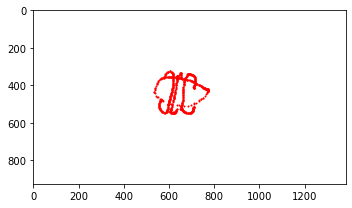

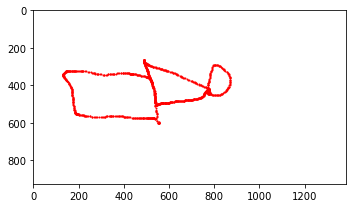

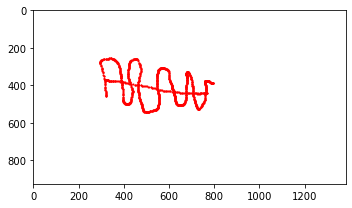

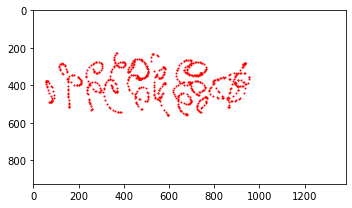

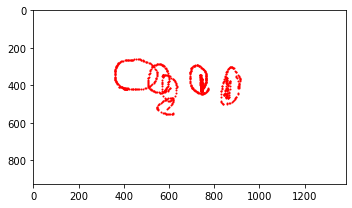

In [63]:
import psutil
train_folder = [7554]#,7556,7557,7558,7559,7560,7561,7563,7569,7570,7571,7572,7573,7574]
for j in train_folder:
    for i in range(1,20):
        url = r"train/"+str(j)+"/SimpleTest/"+str(i)+".csv"
        data = pd.read_csv(url)
        #print(data.info())
        data.columns = data.columns.str.replace(' ', '')
        submit_time = data.iloc[-1][0]
        start_time = data.iloc[-2][0]
        data.dropna(inplace=True)
        data['Time'] = pd.to_datetime(data['Time'],format="%M:%S.%f").dt.time
        data['X'] = data.X.astype(float)

        x = data.X.tolist()
        y = data.Y.tolist()

        fig=plt.figure(figsize=(5,3))
        ax=fig.add_subplot(111)

        plt.gca().invert_yaxis()
        ax.scatter(x,y,s=1,c='red')
        ax.set_xbound(lower=0.0, upper=1381)
        ax.set_ybound(lower=0.0, upper=925)

        plt.tight_layout()
        plt.show()

In [349]:
data = pd.read_csv(r'train/7554/SimpleTest/8.csv')

In [350]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185 entries, 0 to 1184
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          1185 non-null   object 
 1    Y         1183 non-null   float64
 2    Pressure  1183 non-null   float64
 3    TiltX     1183 non-null   float64
 4    TiltY     1183 non-null   float64
 5    Time      1183 non-null   object 
dtypes: float64(4), object(2)
memory usage: 55.7+ KB


In [351]:
print(data.columns)
data.head(3)

Index(['X', ' Y', ' Pressure', ' TiltX', ' TiltY', ' Time'], dtype='object')


,X,Y,Pressure,TiltX,TiltY,Time
0,910.472802864072,888.302113,0.094224,-3875.0,-351.0,00:05.8895936
1,910.472802864072,888.302113,0.099107,-3875.0,-351.0,00:05.9052263
2,910.472802864072,888.302113,0.123278,-3875.0,-351.0,00:05.9208500


In [352]:
data.columns = data.columns.str.replace(' ', '')

In [353]:
submit_time = data.iloc[-1][0]
start_time = data.iloc[-2][0]
data.dropna(inplace=True)

In [354]:
data['Time'] = pd.to_datetime(data['Time'],format="%M:%S.%f").dt.time
data['X'] = data.X.astype(float)

In [355]:
#data = data.set_index(pd.to_datetime(data['Time'],format="%M:%S.%f").dt.time).drop("Time", axis = 1)

In [356]:
data.head(3)

,X,Y,Pressure,TiltX,TiltY,Time
0,910.472803,888.302113,0.094224,-3875.0,-351.0,00:00:05.889593
1,910.472803,888.302113,0.099107,-3875.0,-351.0,00:00:05.905226
2,910.472803,888.302113,0.123278,-3875.0,-351.0,00:00:05.920850


<IPython.core.display.Javascript object>


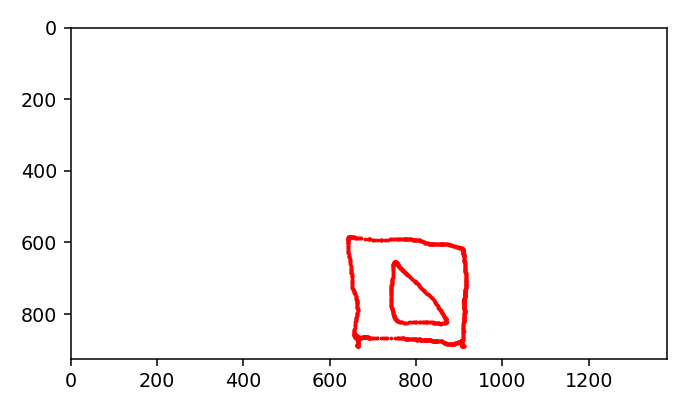

In [357]:
x = data.X.tolist()
y = data.Y.tolist()

fig=plt.figure(figsize=(5,3))
ax=fig.add_subplot(111)

plt.gca().invert_yaxis()
ax.scatter(x,y,s=1,c='red')
ax.set_xbound(lower=0.0, upper=1381)
ax.set_ybound(lower=0.0, upper=925)

plt.tight_layout()
plt.show()

In [358]:
data.Pressure.mean()

0.6515451329598866

<IPython.core.display.Javascript object>


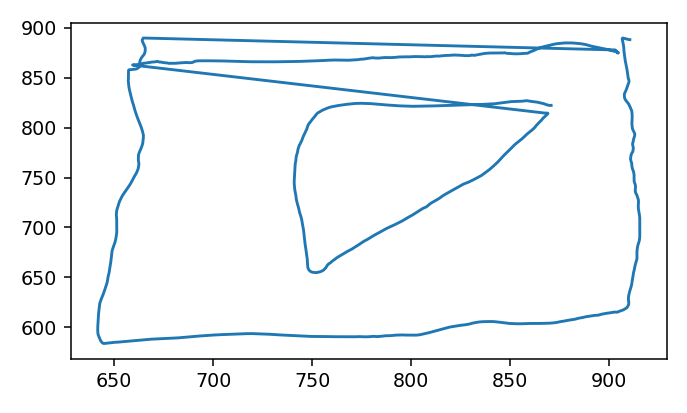

In [359]:
import psutil
%matplotlib notebook
data.Time = data.Time.astype(str)
plt.rcParams['animation.html'] = 'jshtml'
p = data.Pressure.tolist()

fig=plt.figure(figsize=(5,3))
ax=fig.add_subplot(111)

#ax.hist(data.Time,p,c='red',s=1)
ax.plot(x,y)

plt.tight_layout()
plt.show()

In [360]:
hand_raising = 0
for i in range (len(p)-1):
    if (p[i] < 0.04):
        hand_raising += 1
        print(p[i])

print("There are " + str(hand_raising) + " hand raising in the drawing")    

There are 0 hand raising in the drawing


In [363]:
hand_raising = 0
for i in range (len(x)-1):
    if (x[i+1]-x[i] > 10 or y[i+1] -y[i] >10):
        hand_raising +=1
        print('x[i],y[i] :',x[i],',',y[i])
        print('x[i+1], y[i+1] : ',x[i+1],',',y[i+1])
    
print("There are " + str(hand_raising) + " hand raising in the drawing")  

x[i],y[i] : 664.699387920083 , 889.934634484351
x[i+1], y[i+1] :  902.994803095046 , 877.98036724795
x[i],y[i] : 659.275204989029 , 862.866381799284
x[i+1], y[i+1] :  867.289987296455 , 814.733341032452
There are 2 hand raising in the drawing


<IPython.core.display.Javascript object>


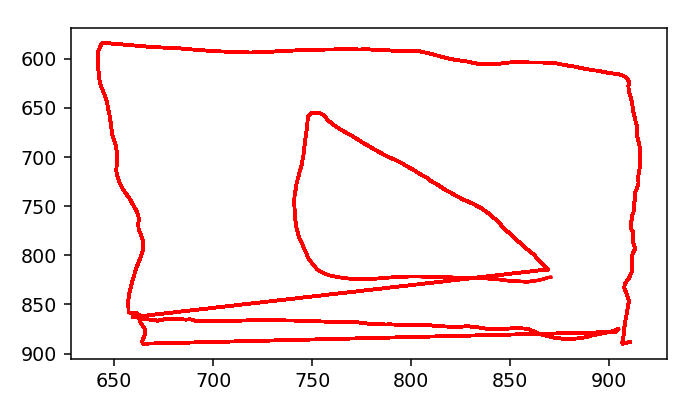

In [361]:
import time
import psutil
import matplotlib.pyplot as plt
%matplotlib notebook

plt.rcParams['animation.html'] = 'jshtml'

fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)
plt.gca().invert_yaxis()
ax.set_xbound(lower=0.0, upper=1381)
ax.set_ybound(lower=0.0, upper=925)
plt.tight_layout()
plt.show()


In [362]:
c=[]
d=[]
for i in range (len(data.X)):
    c.append(x[i])
    d.append(y[i])
    ax.plot(c,d , color='r')
    fig.canvas.draw() 
plt.close()

In [347]:
start_x = x[0]
start_y = y[0]
lines = 0
for i in range (len(x)-1):
    if (x[i] > int(start_x-30) and x[i] < int(start_x+30)):
        continue
    else:
        #print(x[i])
        start_x = x[i]
        lines +=1
print("There are " + str(lines) + " lines in the drawing")    

There are 17 lines in the drawing
